# Processamento de Datasets
### TPC7
***Data de início:*** 2021-11-27<br>
***Data de fim:*** 2021-12-01<br>
***Supervisor:*** José Carlos Leite Ramalho, https://www.di.uminho.pt/~jcr/<br>
***Autor:*** Mariana Estrada de Oliveira, A96938<br>
***Resumo:*** Neste trabalho foi desenvolvido o código para a resolução de exercícios que têm como base a leitura e o processamento de datasets bem como, a produção de dados estatísticos.<br> 
Para tal, foi efetuada a leitura e o processamento da informação contida no ficheiro *alunos.csv*.<br>
Neste sentido, foram desenvolvidas várias funções, nomeadamente, a função *lerDataset()* que permite a leitura da base de dados e, ainda, uma outra, *listarDataset()* que cria uma tabela onde se apresentam o id, nome, curso e média dos alunos contidos no ficheiro. A função *consultarDataset()* possibilita, a partir do id do aluno, aceder a toda a sua informação. Além disso, a função *top10()* retorna o id, nome, curso e média dos 10 alunos com as melhores médias. As funções *distribPorCurso()* e *distribPorMedia()* devolvem como resultado, respetivamente, o número de alunos existentes em cada curso e o número de alunos que apresentam uma determinada média. Por fim, as funções *plotDistribPorCurso()* e *plotDistribPorMedia()* permitem a criação de gráficos de barras que mostram, respetivamente, a distribuição dos alunos por curso e a distribuição dos alunos em função da sua média.<br> 

### Exercício 1

In [1]:
def getAluno(texto):
    textoLimpo=texto.replace("\"","")
    campos=textoLimpo.split(",")
    aluno=[]
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3]=lista
    return aluno


def lerDataset(fnome):
    f=open(fnome, encoding="utf-8")
    bd=[]
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))
    return bd

### Exercício 2

In [2]:
def chaveOrd(a):
    return a[1]


def listarDataset(bd):
    bd.sort(key=chaveOrd)
    print("id           nome            curso     média")
    print("--------------------------------------------")
    for a in bd:
        print(a[0] + " | " + a[1] + " | " + a[2] + " | " + str(sum(a[3])/4))

  

### Exercício 3

In [3]:
def media(m):
    soma = 0
    for i in range(0,len(m)):
        soma = soma + m[i]
    return soma/4



def consultarDataset(bd, id):
    for i in range(0,len(bd)):
        if bd[i][0] == id:
            med = media(bd[i][3])
            return print("INFO :: " + str(bd[i]) + "\nMEDIA :: " + str(med))
        else:
            if i == len(bd)-1:
                return print('Não existe nenhum aluno com esse id!')

### Exercício 4

In [4]:
def chaveOrdena(a):
    return media(a[3])

def top10(bd):                                   
    bd.sort(key = chaveOrdena, reverse = True)           
    novaBD = []                                         
    for aluno in range(0,10):                         
        novoAluno = []                             
        for parametro in range(0,3):                  
            novoAluno.append(bd[aluno][parametro])  
        novoAluno.append(media(bd[aluno][3]))         
        novaBD.append(novoAluno)
    return novaBD
    


### Exercício 5

In [5]:
def distribPorCurso(bd):
    distribuicao = {}
    for a in bd:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]= distribuicao[a[2]] + 1
        else:
            distribuicao[a[2]]=1
    return distribuicao


### Exercício 6

In [6]:
def distribPorMedia(bd):
    distrib={}
    for a in bd:
        if ('M=' + str(round(media(a[3])))) in distrib.keys(): 
            distrib['M=' + str(round(media(a[3])))]= distrib['M=' + str(round(media(a[3])))]+1
        else:
            distrib['M=' + str(round(media(a[3])))]=1
    return(distrib)





### Exercício 7

In [7]:
import matplotlib.pyplot as plt

def plotDistribPorCurso(bd):
    x = []
    y = []
    tick_label = []
 
    a = distribPorCurso(bd)
    i = 1
    for elem in a:
        tick_label.append(elem)
        y.append(a[elem])
        x.append(i)
        i=i+1
    plt.bar(x, y, tick_label = tick_label,
        width = 0.4, color = ['blue', 'pink'])
    
    plt.xlabel('Curso')
    plt.ylabel('Número de alunos')
    plt.title("Distribuição dos alunos por curso")
    plt.show()

    

            

### Exercício 8

In [8]:
import matplotlib.pyplot as plt

def plotDistribPorMedia(bd):
    c=distribPorMedia(bd)
    x=[]
    y=[]
    tick_label = []
    i = 1
    for elem in c:
        tick_label.append(elem)
        y.append(c[elem])
        x.append(i)
        i = i + 1
    plt.bar(x,y, tick_label = tick_label,
        width = 0.6, color = ['green', 'orange'])
    plt.xlabel('Média')
    plt.ylabel('Número de alunos')
    plt.title('Distribuição de alunos por média')

    plt.show()



Exercício 1: 
[['a1', 'Aysha Melanie Gilberto', 'LEI', [12, 8, 19, 8]], ['a2', 'Igor André Cantanhede', 'ENGFIS', [12, 16, 18, 20]], ['a3', 'Laurénio Narciso', 'ENGFIS', [8, 14, 15, 14]], ['a4', 'Jasnoor Casegas', 'LCC', [14, 20, 17, 11]], ['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ['a6', 'Eryk Clementino', 'LEI', [10, 19, 11, 14]], ['a7', 'Ianna Noivo', 'ENGBIOM', [15, 15, 17, 16]], ['a8', 'Ayla Thaissa Reina', 'ENGBIOM', [12, 8, 8, 18]], ['a9', 'Cássia Viviane Coitã', 'ENGFIS', [19, 9, 14, 10]], ['a10', 'Koby Vindima', 'LEI', [9, 14, 20, 13]], ['a11', 'Gustavo Martim Hernandez', 'ENGBIOM', [11, 8, 14, 11]], ['a12', 'Siddarta Beiriz', 'LEI', [17, 10, 16, 16]], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', [15, 15, 18, 19]], ['a14', 'Kaylla Pessego', 'LCC', [10, 14, 17, 15]], ['a15', 'Bianca Cristina Primitivo', 'ENGBIOM', [16, 9, 18, 10]], ['a16', 'Magna Galhardo', 'ENGFIS', [20, 18, 9, 14]], ['a17', 'Grace Isabel Patriarca', 'LCC', [19, 13, 9, 10]], ['a18', 'Saubhagya B

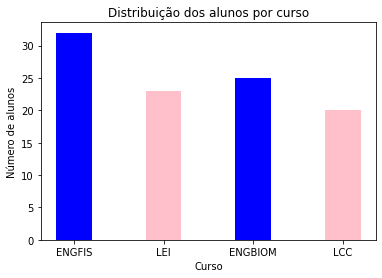



Exercício 8: 


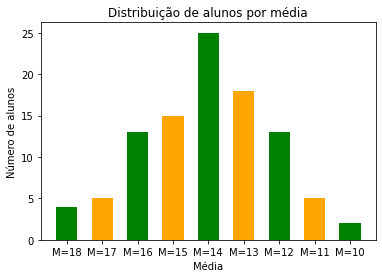

In [9]:
bd = []
bd = lerDataset("alunos.csv")  
print("Exercício 1: ")
print(bd)
print("\n")

print("Exercício 2: ")
listarDataset(bd)
print("\n")

print("Exercício 3: ")
consultarDataset(bd, "a22")
print("\n")

print("Exercício 4: ")
for linha in top10(bd):
    print(linha)
print("\n")

print("Exercício 5: ")
print(distribPorCurso(bd))
print("\n")

print("Exercício 6: ")
print(distribPorMedia(bd))
print("\n")

print("Exercício 7: ")
plotDistribPorCurso(bd)
print("\n")

print("Exercício 8: ")   
plotDistribPorMedia(bd)
